В цьому файлі я проводжу обробку даних для заготовлених колонок

In [2]:
import sys
sys.path.append('../..')
from packages.data_utils import *
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
df = pd.read_csv('../data/interim/games_clubs_competitions_cleaned.csv')

In [4]:
print(df.shape)
df.head(10)

(58486, 40)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,competition_type,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,confederation,is_major_national_league
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,Jens Keller,Thorsten Fink,Veltins-Arena,61973.0,Manuel Gräfe,4-2-3-1,4-2-3-1,domestic_league,L1,27,26.4,12,4,Veltins-Arena,62271,+€10.30m,2022,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,40,europa,True
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,Torsten Lieberknecht,Robin Dutt,EINTRACHT-Stadion,23000.0,Deniz Aytekin,4-3-2-1,4-3-1-2,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,27,26.6,12,6,Weserstadion,42100,€-1.13m,2024,40,europa,True
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,4-2-3-1,4-3-2-1,domestic_league,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,40,europa,True
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,4-3-2-1,4-2-3-1,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,27,25.4,20,10,Deutsche Bank Park,58000,+€48.19m,2024,40,europa,True
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,Jürgen Klopp,Thorsten Fink,SIGNAL IDUNA PARK,80645.0,Tobias Welz,4-2-3-1,3-5-2,domestic_league,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,40,europa,True
5,2321079,L1,2013,5. Matchday,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,Torsten Lieberknecht,Michael Wiesinger,EINTRACHT-Stadion,22570.0,Marco Fritz,4-4-2 double 6,4-2-3-1,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,33,25.2,7,2,Max-Morlock-Stadion,50000,+€2.63m,2018,40,europa,True
6,2321086,L1,2013,6. Matchday,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,4-2-3-1,4-2-3-1,domestic_league,L1,33,25.2,7,2,Max-Morlock-Stadion,50000,+€2.63m,2018,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,40,europa,True
7,2321152,L1,2013,11. Matchday,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,4-2-3-1,4-2-3-1,domestic_league,L1,36,24.1,14,7,Olympiastadion Berlin,74667,+€6.70m,2022,L1,27,26.4,12,4,Veltins-Arena,62271,+€10.30m,2022,40,europa,True
8,2321205,L1,2013,17. Matchday,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,4-2-3-1,4-4-2 Diamond,domestic_league,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,L1,24,27.2,10,7,Mewa Arena,33305,+€26.25m,2024,40,europa,True
9,2321233,L1,2013,20. Matchday,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,Bert van Marwijk,Jos Luhukay,Volksparkstadion,48593.0,Deniz Aytekin,4-2-3-1,4-1-4-1,domestic_league,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,L1,36,24.1,14,7,Olympiastadion Berlin,74667,+€6.70m,2022,40,europa,True


In [5]:
# --- КРОК 1: Обробка пропущених значень ---

# Варіант 1: Видалити рядки з хоча б одним пропущеним значенням
print(df.shape)
df.dropna(inplace=True)
print(df.shape)
df.head(10)

# Варіант 2: Видалити стовпці, які мають забагато пропущених значень (наприклад, > 70%)
# print("Видалення стовпців з великою кількістю пропущених значень...")
# threshold = len(df) * 0.3 # Зберігаємо стовпці, де є хоча б 30% непустих значень
# df.dropna(axis=1, thresh=threshold, inplace=True)

# Варіант 3: Заповнити пропущені значення
# print("Заповнення пропущених значень...")
# Заповнити числовим значенням (наприклад, середнім, медіаною, нулем)
# df['Назва_числового_стовпця'].fillna(df['Назва_числового_стовпця'].mean(), inplace=True)
# df['Назва_іншого_числового_стовпця'].fillna(0, inplace=True)

# Заповнити категоріальним значенням (наприклад, модою, 'Невідомо')
# df['Назва_категоріального_стовпця'].fillna(df['Назва_категоріального_стовпця'].mode()[0], inplace=True)
# df['Назва_іншого_категоріального_стовпця'].fillna('Невідомо', inplace=True)

(58486, 40)
(38850, 40)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,competition_type,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,confederation,is_major_national_league
0,2321027,L1,2013,1. Matchday,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,Jens Keller,Thorsten Fink,Veltins-Arena,61973.0,Manuel Gräfe,4-2-3-1,4-2-3-1,domestic_league,L1,27,26.4,12,4,Veltins-Arena,62271,+€10.30m,2022,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,40,europa,True
1,2321033,L1,2013,1. Matchday,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,Torsten Lieberknecht,Robin Dutt,EINTRACHT-Stadion,23000.0,Deniz Aytekin,4-3-2-1,4-3-1-2,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,27,26.6,12,6,Weserstadion,42100,€-1.13m,2024,40,europa,True
2,2321044,L1,2013,2. Matchday,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,4-2-3-1,4-3-2-1,domestic_league,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,40,europa,True
3,2321060,L1,2013,3. Matchday,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,4-3-2-1,4-2-3-1,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,27,25.4,20,10,Deutsche Bank Park,58000,+€48.19m,2024,40,europa,True
4,2321072,L1,2013,5. Matchday,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,Jürgen Klopp,Thorsten Fink,SIGNAL IDUNA PARK,80645.0,Tobias Welz,4-2-3-1,3-5-2,domestic_league,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,40,europa,True
5,2321079,L1,2013,5. Matchday,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,Torsten Lieberknecht,Michael Wiesinger,EINTRACHT-Stadion,22570.0,Marco Fritz,4-4-2 double 6,4-2-3-1,domestic_league,L1,30,25.6,11,2,EINTRACHT-Stadion,23325,+€750k,2013,L1,33,25.2,7,2,Max-Morlock-Stadion,50000,+€2.63m,2018,40,europa,True
6,2321086,L1,2013,6. Matchday,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,4-2-3-1,4-2-3-1,domestic_league,L1,33,25.2,7,2,Max-Morlock-Stadion,50000,+€2.63m,2018,L1,28,25.2,14,18,SIGNAL IDUNA PARK,81365,€-30.60m,2024,40,europa,True
7,2321152,L1,2013,11. Matchday,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,4-2-3-1,4-2-3-1,domestic_league,L1,36,24.1,14,7,Olympiastadion Berlin,74667,+€6.70m,2022,L1,27,26.4,12,4,Veltins-Arena,62271,+€10.30m,2022,40,europa,True
8,2321205,L1,2013,17. Matchday,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,4-2-3-1,4-4-2 Diamond,domestic_league,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,L1,24,27.2,10,7,Mewa Arena,33305,+€26.25m,2024,40,europa,True
9,2321233,L1,2013,20. Matchday,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,Bert van Marwijk,Jos Luhukay,Volksparkstadion,48593.0,Deniz Aytekin,4-2-3-1,4-1-4-1,domestic_league,L1,30,23.6,15,4,Volksparkstadion,57000,€-6.00m,2017,L1,36,24.1,14,7,Olympiastadion Berlin,74667,+€6.70m,2022,40,europa,True


In [6]:
a = [60551,  6996,  2477,  2740, 55686, 83678, 18105, 16239, 39097,
       16247, 49364,  6414,  6993, 86209, 10690, 23611, 18303, 26459,
         338,  6992, 16245,   339,  4482, 48726,  8838,  2227, 61825,
       63007,   660,  9007,  3592,  6994,  2783, 53646, 48332, 85465]

In [7]:
df[df['away_club_id'] == 660][['home_club_id', 'away_club_id']].shape

(69, 2)

In [8]:
df[df['home_club_formation'] == '4-2-3-1'].shape


(11865, 40)

In [9]:
df['net_transfer_record_away_club']

0         €-6.00m
1         €-1.13m
2          +€750k
3        +€48.19m
4         €-6.00m
           ...   
58481         +-0
58482      €-900k
58483         +-0
58484      €-900k
58485      €-900k
Name: net_transfer_record_away_club, Length: 38850, dtype: object

In [10]:
df.to_csv('../res/random_forest_models/v0/dont_transform_ds.csv', index=False)

In [5]:
# --- КРОК 2: Обробка дублікатів ---
print("Кількість дубльованих рядків (до видалення):", df.duplicated().sum())
# Видалити дубльовані рядки
# df.drop_duplicates(inplace=True)
# print("Кількість дубльованих рядків (після видалення):", df.duplicated().sum())

Кількість дубльованих рядків (до видалення): 0


In [6]:
# --- КРОК 3: Обробка текстових даних (за потреби) ---
# Думав що це якась фігня, але це може бути корисно для стовпців
# [home_club_formation, away_club_formation, net_transfer_record_home_club, net_transfer_record_away_club]
# Очищення текстових стовпців (прибрати пробіли, привести до нижнього регістру тощо)
# df['Текстовий_стовпець'] = df['Текстовий_стовпець'].str.strip().str.lower()
# df['Текстовий_стовпець'] = df['Текстовий_стовпець'].str.replace('[^\w\s]', '', regex=True) # Прибрати пунктуацію


In [7]:
df.select_dtypes(exclude=['int', 'float']).nunique()

competition_id                         14
round                                  38
date                                 2417
home_club_manager_name               1454
away_club_manager_name               1471
stadium                               491
referee                               782
home_club_formation                    33
away_club_formation                    34
competition_type                        1
domestic_competition_id_home_club      14
stadium_name_home_club                382
net_transfer_record_home_club         302
domestic_competition_id_away_club      14
stadium_name_away_club                382
net_transfer_record_away_club         302
confederation                           1
is_major_national_league                2
dtype: int64

In [6]:
df = df.drop(['confederation', 'competition_type'], axis=1)
# У цих колонках тільки одне значення

In [9]:
# --- КРОК 4: Перетворення категоріальних даних в числові ---

# Я використав перше
# 1. Label Encoding (для ordinal/порядкових ознак):
col_for_LE = [
    'competition_id', 'round', 'home_club_manager_name','away_club_manager_name', 'stadium', 'referee',
    'domestic_competition_id_home_club', 'stadium_name_home_club','domestic_competition_id_away_club',
    'stadium_name_away_club'
]
# for col in col_for_LE:
#     df[col] = df[col].astype('category').cat.codes
   
# 2. One-Hot Encoding (для номінативних ознак):
# df = pd.get_dummies(df, columns=['column_name'])

In [10]:
import pickle

label_encoders = {}
for col in col_for_LE:
    df[col] = df[col].astype('category')
    label_encoders[col] = dict(enumerate(df[col].cat.categories))
    df[col] = df[col].cat.codes

# Зберегти mapping у файл
with open('./trans/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [11]:
print(df.shape)
df.head(10)

(38850, 38)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,is_major_national_league
0,2321027,7,2013,0,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,597,1321,456,61973.0,468,4-2-3-1,4-2-3-1,7,27,26.4,12,4,357,62271,+€10.30m,2022,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True
1,2321033,7,2013,0,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,1322,1135,105,23000.0,201,4-3-2-1,4-3-1-2,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,26.6,12,6,369,42100,€-1.13m,2024,40,True
2,2321044,7,2013,11,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,687,1338,343,80200.0,599,4-2-3-1,4-3-2-1,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,25.6,11,2,77,23325,+€750k,2013,40,True
3,2321060,7,2013,22,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,1322,119,105,23325.0,755,4-3-2-1,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,25.4,20,10,70,58000,+€48.19m,2024,40,True
4,2321072,7,2013,33,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,687,1321,343,80645.0,713,4-2-3-1,3-5-2,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True
5,2321079,7,2013,33,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,1322,871,105,22570.0,476,4-4-2 double 6,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,33,25.2,7,2,207,50000,+€2.63m,2018,40,True
6,2321086,7,2013,34,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,856,695,265,50000.0,424,4-2-3-1,4-2-3-1,7,33,25.2,7,2,207,50000,+€2.63m,2018,7,28,25.2,14,18,270,81365,€-30.60m,2024,40,True
7,2321152,7,2013,2,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,639,604,301,69277.0,323,4-2-3-1,4-2-3-1,7,36,24.1,14,7,233,74667,+€6.70m,2022,7,27,26.4,12,4,357,62271,+€10.30m,2022,40,True
8,2321205,7,2013,8,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,147,1320,464,50000.0,106,4-2-3-1,4-4-2 Diamond,7,30,23.6,15,4,364,57000,€-6.00m,2017,7,24,27.2,10,7,214,33305,+€26.25m,2024,40,True
9,2321233,7,2013,12,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,147,647,464,48593.0,201,4-2-3-1,4-1-4-1,7,30,23.6,15,4,364,57000,€-6.00m,2017,7,36,24.1,14,7,233,74667,+€6.70m,2022,40,True


In [12]:
# Обробка дати
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # 0 - понеділок, 6 - неділя

In [13]:
# Щоб закодувати net_transfer_record_home_club і away_club_formation однаково (тобто, щоб однакові значення в обох колонках отримали однаковий код), потрібно:
# 1. Зібрати всі унікальні значення з обох колонок
unique_values = pd.unique(
    pd.concat([
        df['home_club_formation'].astype(str),
        df['away_club_formation'].astype(str)
    ])
)

# 2. Створити mapping
value_to_code = {val: i for i, val in enumerate(unique_values)}

# 3. Замапити коди на обидві колонки
df['home_club_formation_code'] = df['home_club_formation'].astype(str).map(value_to_code)
df['away_club_formation_code'] = df['away_club_formation'].astype(str).map(value_to_code)

In [14]:
# Зберегти mapping у файл
with open('./trans/formation_encoder.pkl', 'wb') as f:
    pickle.dump(value_to_code, f)

In [15]:
print(df.shape)
df.head(10)

(38850, 44)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,is_major_national_league,year,month,day,dayofweek,home_club_formation_code,away_club_formation_code
0,2321027,7,2013,0,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,597,1321,456,61973.0,468,4-2-3-1,4-2-3-1,7,27,26.4,12,4,357,62271,+€10.30m,2022,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,8,11,6,0,0
1,2321033,7,2013,0,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,1322,1135,105,23000.0,201,4-3-2-1,4-3-1-2,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,26.6,12,6,369,42100,€-1.13m,2024,40,True,2013,8,10,5,1,6
2,2321044,7,2013,11,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,687,1338,343,80200.0,599,4-2-3-1,4-3-2-1,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,25.6,11,2,77,23325,+€750k,2013,40,True,2013,8,18,6,0,1
3,2321060,7,2013,22,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,1322,119,105,23325.0,755,4-3-2-1,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,25.4,20,10,70,58000,+€48.19m,2024,40,True,2013,8,25,6,1,0
4,2321072,7,2013,33,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,687,1321,343,80645.0,713,4-2-3-1,3-5-2,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,9,14,5,0,15
5,2321079,7,2013,33,2013-09-15,23.0,4.0,1.0,1.0,18.0,16.0,1322,871,105,22570.0,476,4-4-2 double 6,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,33,25.2,7,2,207,50000,+€2.63m,2018,40,True,2013,9,15,6,2,0
6,2321086,7,2013,34,2013-09-21,4.0,16.0,1.0,1.0,15.0,1.0,856,695,265,50000.0,424,4-2-3-1,4-2-3-1,7,33,25.2,7,2,207,50000,+€2.63m,2018,7,28,25.2,14,18,270,81365,€-30.60m,2024,40,True,2013,9,21,5,0,0
7,2321152,7,2013,2,2013-11-02,44.0,33.0,0.0,2.0,7.0,6.0,639,604,301,69277.0,323,4-2-3-1,4-2-3-1,7,36,24.1,14,7,233,74667,+€6.70m,2022,7,27,26.4,12,4,357,62271,+€10.30m,2022,40,True,2013,11,2,5,0,0
8,2321205,7,2013,8,2013-12-21,41.0,39.0,2.0,3.0,14.0,9.0,147,1320,464,50000.0,106,4-2-3-1,4-4-2 Diamond,7,30,23.6,15,4,364,57000,€-6.00m,2017,7,24,27.2,10,7,214,33305,+€26.25m,2024,40,True,2013,12,21,5,0,9
9,2321233,7,2013,12,2014-02-08,41.0,44.0,0.0,3.0,17.0,7.0,147,647,464,48593.0,201,4-2-3-1,4-1-4-1,7,30,23.6,15,4,364,57000,€-6.00m,2017,7,36,24.1,14,7,233,74667,+€6.70m,2022,40,True,2014,2,8,5,0,5


In [16]:
print((df[df['home_club_formation_code'] == df['away_club_formation_code']]['home_club_formation'] == df[df['home_club_formation_code'] == df['away_club_formation_code']]['away_club_formation']).all())
df[df['home_club_formation_code'] == df['away_club_formation_code']][['home_club_formation', 'away_club_formation']]

True


,home_club_formation,away_club_formation
0,4-2-3-1,4-2-3-1
6,4-2-3-1,4-2-3-1
7,4-2-3-1,4-2-3-1
10,4-2-3-1,4-2-3-1
17,4-4-2 double 6,4-4-2 double 6
...,...,...
58473,4-3-3 Defending,4-3-3 Defending
58474,4-3-3 Defending,4-3-3 Defending
58480,4-3-3 Defending,4-3-3 Defending
58483,4-3-3 Defending,4-3-3 Defending


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38850 entries, 0 to 58485
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   game_id                            38850 non-null  int64         
 1   competition_id                     38850 non-null  int8          
 2   season                             38850 non-null  int64         
 3   round                              38850 non-null  int8          
 4   date                               38850 non-null  datetime64[ns]
 5   home_club_id                       38850 non-null  float64       
 6   away_club_id                       38850 non-null  float64       
 7   home_club_goals                    38850 non-null  float64       
 8   away_club_goals                    38850 non-null  float64       
 9   home_club_position                 38850 non-null  float64       
 10  away_club_position                 3885

In [18]:
def parse_transfer_value(value):
    if pd.isnull(value):
        return None
    value = value.replace('€', '').replace('+', '').replace(' ', '')
    sign = -1 if '-' in value else 1
    value = value.replace('-', '')
    if value.endswith('m'):
        num = float(value[:-1]) * 1_000_000
    elif value.endswith('k'):
        num = float(value[:-1]) * 1_000
    else:
        num = float(value)
    return sign * num

# Приклад для DataFrame:
df['net_transfer_record_home_club_num'] = df['net_transfer_record_home_club'].apply(parse_transfer_value)
df['net_transfer_record_away_club_num'] = df['net_transfer_record_away_club'].apply(parse_transfer_value)

In [19]:
df[[
    'net_transfer_record_home_club', 'net_transfer_record_home_club_num',
    'net_transfer_record_away_club', 'net_transfer_record_away_club_num'
]]

,net_transfer_record_home_club,net_transfer_record_home_club_num,net_transfer_record_away_club,net_transfer_record_away_club_num
0,+€10.30m,10300000.0,€-6.00m,-6000000.0
1,+€750k,750000.0,€-1.13m,-1130000.0
2,€-30.60m,-30600000.0,+€750k,750000.0
3,+€750k,750000.0,+€48.19m,48190000.0
4,€-30.60m,-30600000.0,€-6.00m,-6000000.0
...,...,...,...,...
58481,€-900k,-900000.0,+-0,-0.0
58482,+-0,-0.0,€-900k,-900000.0
58483,€-900k,-900000.0,+-0,-0.0
58484,+-0,-0.0,€-900k,-900000.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
corr_col = [
    'competition_id', 'season', 'round', 'home_club_id',
    'away_club_id', 'home_club_goals', 'away_club_goals',
    'home_club_position', 'away_club_position', 'home_club_manager_name',
    'away_club_manager_name', 'stadium', 'attendance', 'referee',
    'domestic_competition_id_home_club', 'squad_size_home_club',
    'average_age_home_club', 'foreigners_number_home_club',
    'national_team_players_home_club', 'stadium_name_home_club',
    'stadium_seats_home_club',
    'last_season_home_club', 'domestic_competition_id_away_club',
    'squad_size_away_club', 'average_age_away_club',
    'foreigners_number_away_club', 'national_team_players_away_club',
    'stadium_name_away_club', 'stadium_seats_away_club',
    'last_season_away_club', 'country_id',
    'is_major_national_league', 'year', 'month', 'day', 'dayofweek',
    'home_club_formation_code', 'away_club_formation_code',
    'net_transfer_record_home_club_num',
    'net_transfer_record_away_club_num'
]

In [22]:
corr_matrix = df[corr_col].corr(numeric_only=True)
print(corr_matrix[['home_club_goals', 'away_club_goals']])

                                   home_club_goals  away_club_goals
competition_id                           -0.002167        -0.000259
season                                    0.006748         0.029755
round                                     0.009646         0.010907
home_club_id                             -0.059364         0.019770
away_club_id                              0.016188        -0.058744
home_club_goals                           1.000000        -0.097934
away_club_goals                          -0.097934         1.000000
home_club_position                       -0.339888         0.267575
away_club_position                        0.275675        -0.311519
home_club_manager_name                    0.027963        -0.011179
away_club_manager_name                   -0.021819         0.010131
stadium                                  -0.017794         0.012508
attendance                                0.181431        -0.073157
referee                                  -0.0002

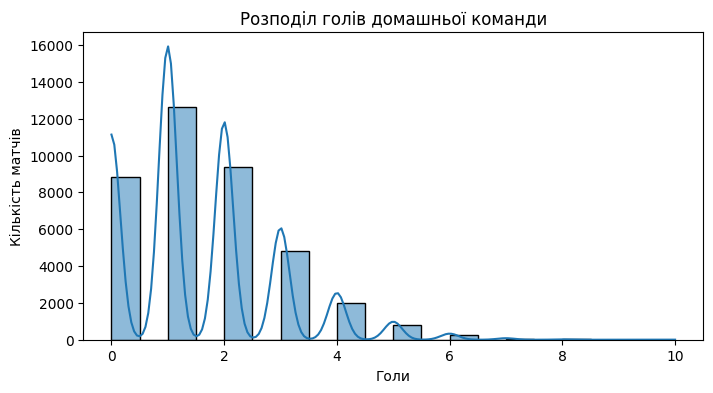

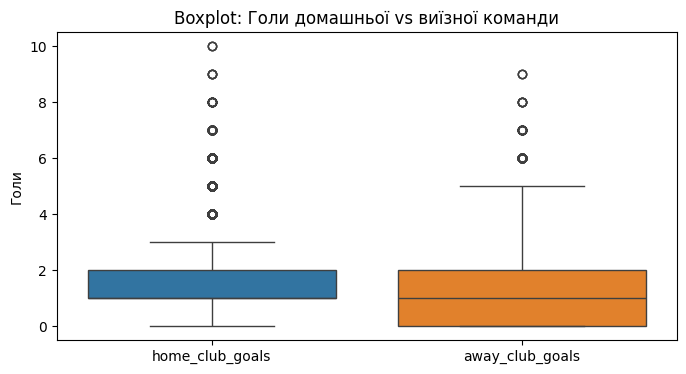

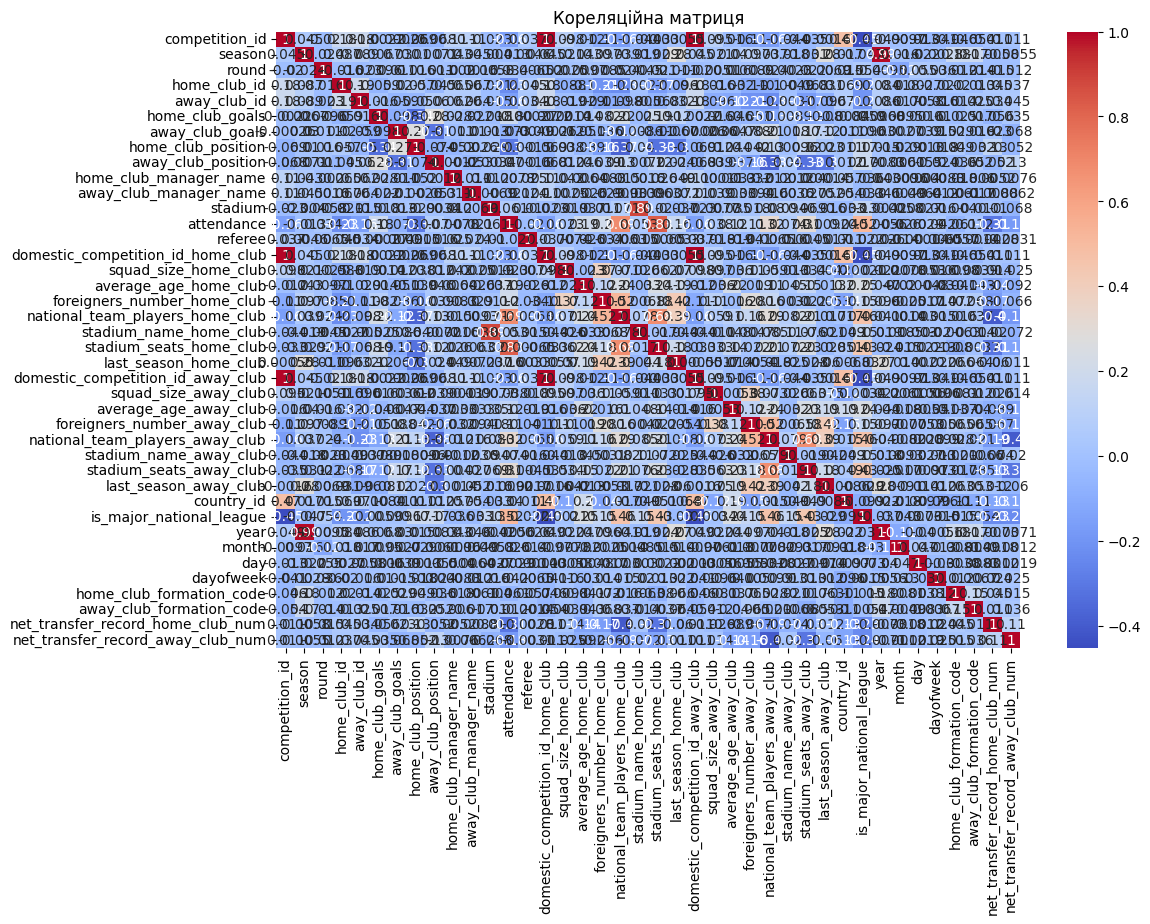

In [23]:
# Гістограма для числової колонки
plt.figure(figsize=(8, 4))
sns.histplot(df['home_club_goals'], bins=20, kde=True)
plt.title('Розподіл голів домашньої команди')
plt.xlabel('Голи')
plt.ylabel('Кількість матчів')
plt.show()

# Boxplot для порівняння голів домашньої та виїзної команди
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['home_club_goals', 'away_club_goals']])
plt.title('Boxplot: Голи домашньої vs виїзної команди')
plt.ylabel('Голи')
plt.show()

# Теплова карта кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(df[corr_col].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

In [24]:
# --- КРОК 5: Обробка викидів (Outliers - за потреби та обережно!) ---

In [25]:
print(df.shape)
df.head()

(38850, 46)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,is_major_national_league,year,month,day,dayofweek,home_club_formation_code,away_club_formation_code,net_transfer_record_home_club_num,net_transfer_record_away_club_num
0,2321027,7,2013,0,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,597,1321,456,61973.0,468,4-2-3-1,4-2-3-1,7,27,26.4,12,4,357,62271,+€10.30m,2022,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,8,11,6,0,0,10300000.0,-6000000.0
1,2321033,7,2013,0,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,1322,1135,105,23000.0,201,4-3-2-1,4-3-1-2,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,26.6,12,6,369,42100,€-1.13m,2024,40,True,2013,8,10,5,1,6,750000.0,-1130000.0
2,2321044,7,2013,11,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,687,1338,343,80200.0,599,4-2-3-1,4-3-2-1,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,25.6,11,2,77,23325,+€750k,2013,40,True,2013,8,18,6,0,1,-30600000.0,750000.0
3,2321060,7,2013,22,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,1322,119,105,23325.0,755,4-3-2-1,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,25.4,20,10,70,58000,+€48.19m,2024,40,True,2013,8,25,6,1,0,750000.0,48190000.0
4,2321072,7,2013,33,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,687,1321,343,80645.0,713,4-2-3-1,3-5-2,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,9,14,5,0,15,-30600000.0,-6000000.0


In [26]:
corr_col.remove('is_major_national_league')

In [27]:
for col in corr_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {(outliers.shape[0] / len(df) * 100):.4f}% викидів')

competition_id: 0.0000% викидів
season: 0.0000% викидів
round: 0.0000% викидів
home_club_id: 10.1905% викидів
away_club_id: 10.2394% викидів
home_club_goals: 8.1030% викидів
away_club_goals: 0.3552% викидів
home_club_position: 0.0000% викидів
away_club_position: 0.0000% викидів
home_club_manager_name: 0.0000% викидів
away_club_manager_name: 0.0000% викидів
stadium: 0.0000% викидів
attendance: 2.5251% викидів
referee: 0.0000% викидів
domestic_competition_id_home_club: 0.0000% викидів
squad_size_home_club: 2.0772% викидів
average_age_home_club: 0.8880% викидів
foreigners_number_home_club: 1.0219% викидів
national_team_players_home_club: 0.0000% викидів
stadium_name_home_club: 0.0000% викидів
stadium_seats_home_club: 0.0000% викидів
last_season_home_club: 23.3694% викидів
domestic_competition_id_away_club: 0.0000% викидів
squad_size_away_club: 2.1441% викидів
average_age_away_club: 0.8932% викидів
foreigners_number_away_club: 1.0450% викидів
national_team_players_away_club: 0.0000% викиді

In [28]:
# Обробка викидів - це складна тема, яка потребує розуміння даних.
# Простий приклад: видалення рядків, де значення у стовпці виходить за межі певного діапазону

# for col in corr_col:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
print(df.shape)
df.head()

(38850, 46)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,domestic_competition_id_home_club,squad_size_home_club,average_age_home_club,foreigners_number_home_club,national_team_players_home_club,stadium_name_home_club,stadium_seats_home_club,net_transfer_record_home_club,last_season_home_club,domestic_competition_id_away_club,squad_size_away_club,average_age_away_club,foreigners_number_away_club,national_team_players_away_club,stadium_name_away_club,stadium_seats_away_club,net_transfer_record_away_club,last_season_away_club,country_id,is_major_national_league,year,month,day,dayofweek,home_club_formation_code,away_club_formation_code,net_transfer_record_home_club_num,net_transfer_record_away_club_num
0,2321027,7,2013,0,2013-08-11,33.0,41.0,3.0,3.0,8.0,9.0,597,1321,456,61973.0,468,4-2-3-1,4-2-3-1,7,27,26.4,12,4,357,62271,+€10.30m,2022,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,8,11,6,0,0,10300000.0,-6000000.0
1,2321033,7,2013,0,2013-08-10,23.0,86.0,0.0,1.0,13.0,7.0,1322,1135,105,23000.0,201,4-3-2-1,4-3-1-2,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,26.6,12,6,369,42100,€-1.13m,2024,40,True,2013,8,10,5,1,6,750000.0,-1130000.0
2,2321044,7,2013,11,2013-08-18,16.0,23.0,2.0,1.0,1.0,15.0,687,1338,343,80200.0,599,4-2-3-1,4-3-2-1,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,25.6,11,2,77,23325,+€750k,2013,40,True,2013,8,18,6,0,1,-30600000.0,750000.0
3,2321060,7,2013,22,2013-08-25,23.0,24.0,0.0,2.0,18.0,11.0,1322,119,105,23325.0,755,4-3-2-1,4-2-3-1,7,30,25.6,11,2,77,23325,+€750k,2013,7,27,25.4,20,10,70,58000,+€48.19m,2024,40,True,2013,8,25,6,1,0,750000.0,48190000.0
4,2321072,7,2013,33,2013-09-14,16.0,41.0,6.0,2.0,1.0,15.0,687,1321,343,80645.0,713,4-2-3-1,3-5-2,7,28,25.2,14,18,270,81365,€-30.60m,2024,7,30,23.6,15,4,364,57000,€-6.00m,2017,40,True,2013,9,14,5,0,15,-30600000.0,-6000000.0


In [30]:
# --- КРОК 6: Нормалізація ---
# 1. Мін-Макс нормалізація (до діапазону [0, 1]):
from sklearn.preprocessing import MinMaxScaler

corr_col.remove('home_club_goals')
corr_col.remove('away_club_goals')

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[corr_col] = scaler.fit_transform(df[corr_col])

# 2. Z-нормалізація (стандартизація, середнє = 0, std = 1):
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_scaled = df.copy()
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns
# df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [31]:
import joblib

# Зберегти scaler у файл
joblib.dump(scaler, './trans/minmax_scaler.pkl')

['./trans/minmax_scaler.pkl']

In [32]:
show_table_info(df_scaled, all_info=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38850 entries, 0 to 58485
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   game_id                            38850 non-null  int64         
 1   competition_id                     38850 non-null  float64       
 2   season                             38850 non-null  float64       
 3   round                              38850 non-null  float64       
 4   date                               38850 non-null  datetime64[ns]
 5   home_club_id                       38850 non-null  float64       
 6   away_club_id                       38850 non-null  float64       
 7   home_club_goals                    38850 non-null  float64       
 8   away_club_goals                    38850 non-null  float64       
 9   home_club_position                 38850 non-null  float64       
 10  away_club_position                 3885

In [33]:
df_scaled.to_csv('../../data/processed/df_res.csv', index=False)
# '../../data/processed/df_res_outlier.csv' - з обробкою викидів
# '../../data/processed/df_res.csv' - без обробки викидів